Libraries:

In [9]:
import pandas as pd 
import numpy as np 
import plotly
import matplotlib.pyplot as plt 
import seaborn as sns 

#import missingno as msno
import warnings
warnings.filterwarnings("ignore")

Data Preparation:

In [10]:
# import tkinter as tk
# from tkinter import filedialog

# def upload_file():
#     filename = filedialog.askopenfilename()
#     print("Selected file:", filename)
#     # You can perform further actions with the uploaded file here

# # Create a Tkinter window
# root = tk.Tk()

# # Call the upload_file function when the button is clicked
# upload_button = tk.Button(root, text="Upload File", command=upload_file)
# upload_button.pack()

# # Run the Tkinter event loop
# root.mainloop()

In [11]:
data = pd.read_csv("water_potability.csv")
df = pd.DataFrame(data)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [12]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [13]:
df.shape

(3276, 10)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [15]:
df.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

In [16]:
df['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

There is an imbalance of data for the target variable. Non poptable samples have been oversampled versus the potatble samples.

<Axes: xlabel='Potability', ylabel='count'>

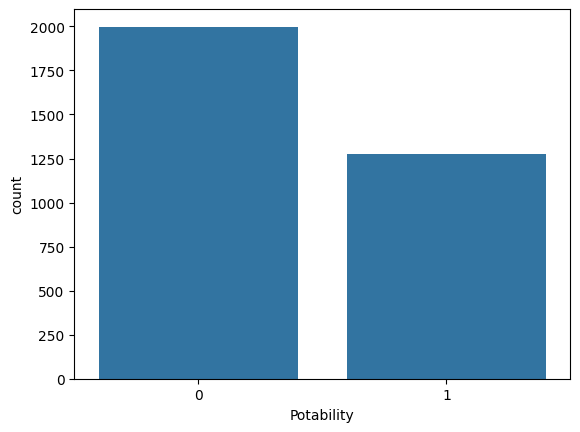

In [17]:
sns.countplot(data = df, x = 'Potability')

<Axes: ylabel='count'>

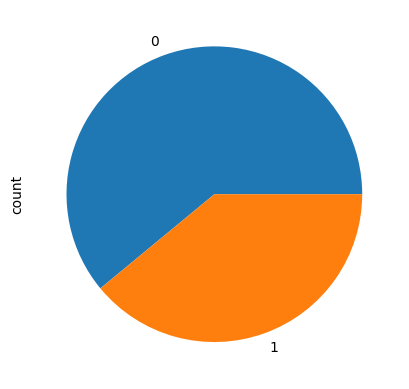

In [18]:
df.Potability.value_counts().plot(kind ='pie')

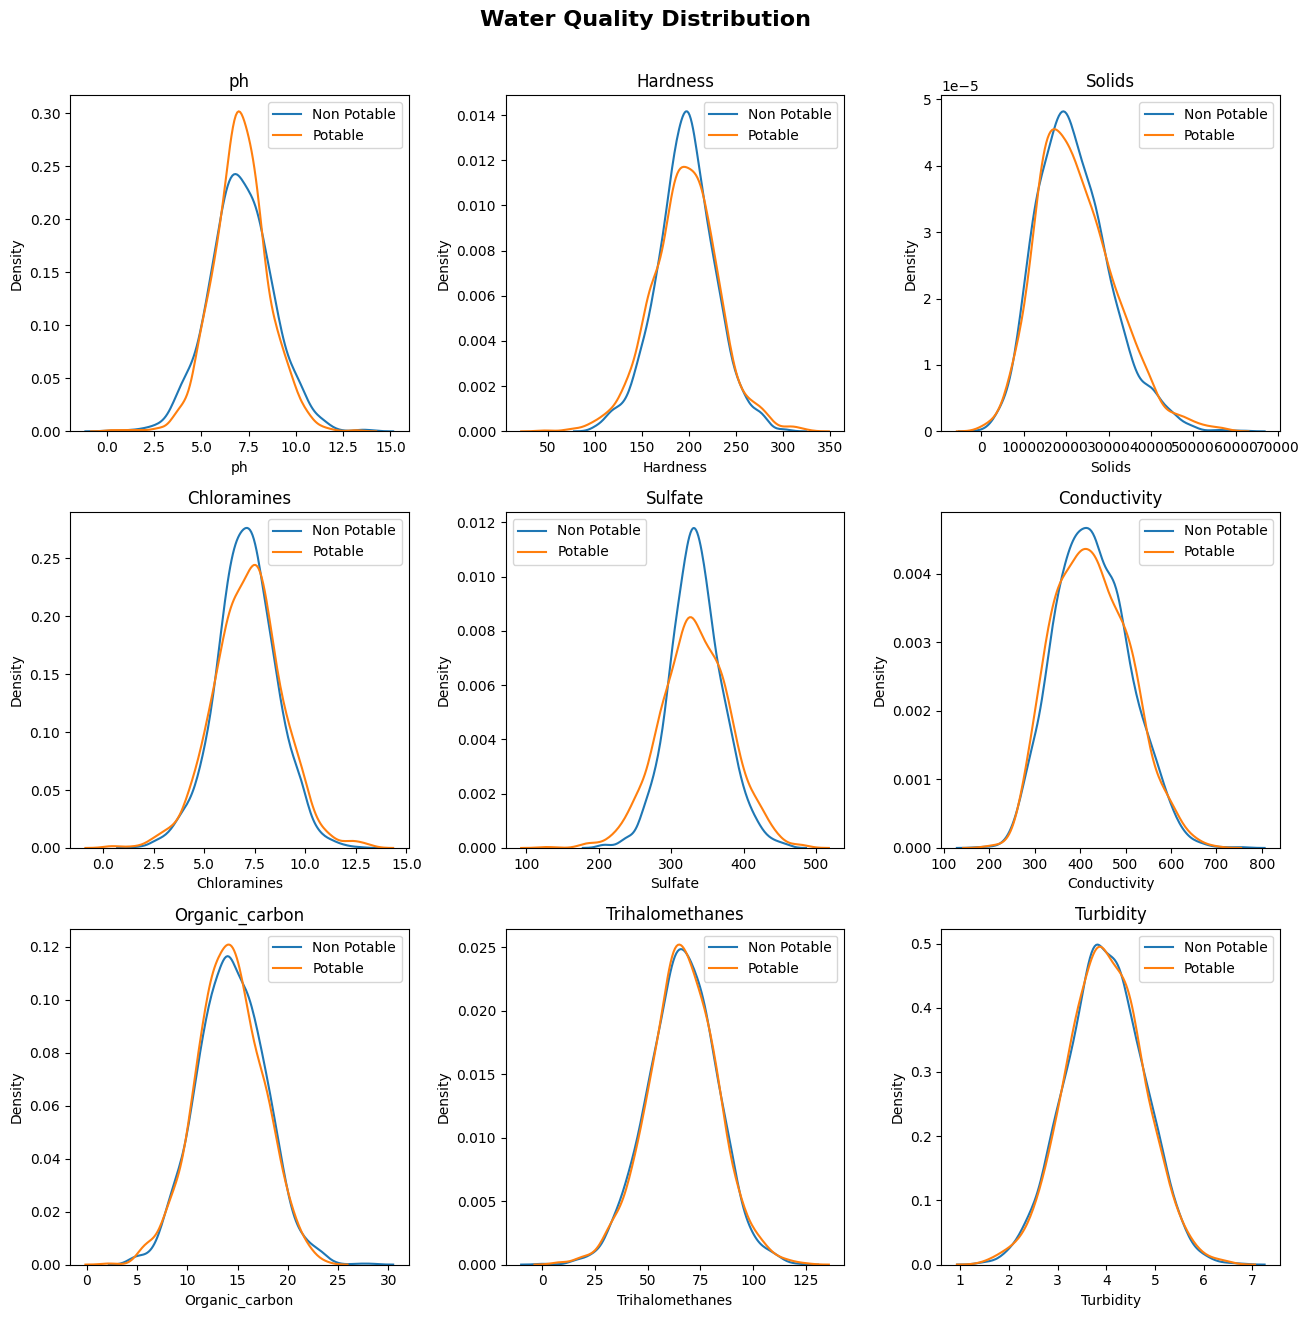

In [19]:
non_potable = df[df['Potability'] == 0]
potable = df[df['Potability'] == 1]

plt.figure(figsize=(13,13))

for ax,col in enumerate(df.columns[:9]):
    plt.subplot(3,3,ax+1)
    plt.title(col)
    sns.kdeplot(x=non_potable[col],label = "Non Potable")
    sns.kdeplot(x=potable[col],label = "Potable")
    plt.legend()

plt.suptitle('Water Quality Distribution',y=1.01, size = 16, color = 'black', weight='bold')   
plt.tight_layout()

In [20]:
df.drop('Potability', axis=1).skew()

ph                 0.025630
Hardness          -0.039342
Solids             0.621634
Chloramines       -0.012098
Sulfate           -0.035947
Conductivity       0.264490
Organic_carbon     0.025533
Trihalomethanes   -0.083031
Turbidity         -0.007817
dtype: float64

In [21]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


Text(0.5, 0.92, 'Water Quality Heat Map')

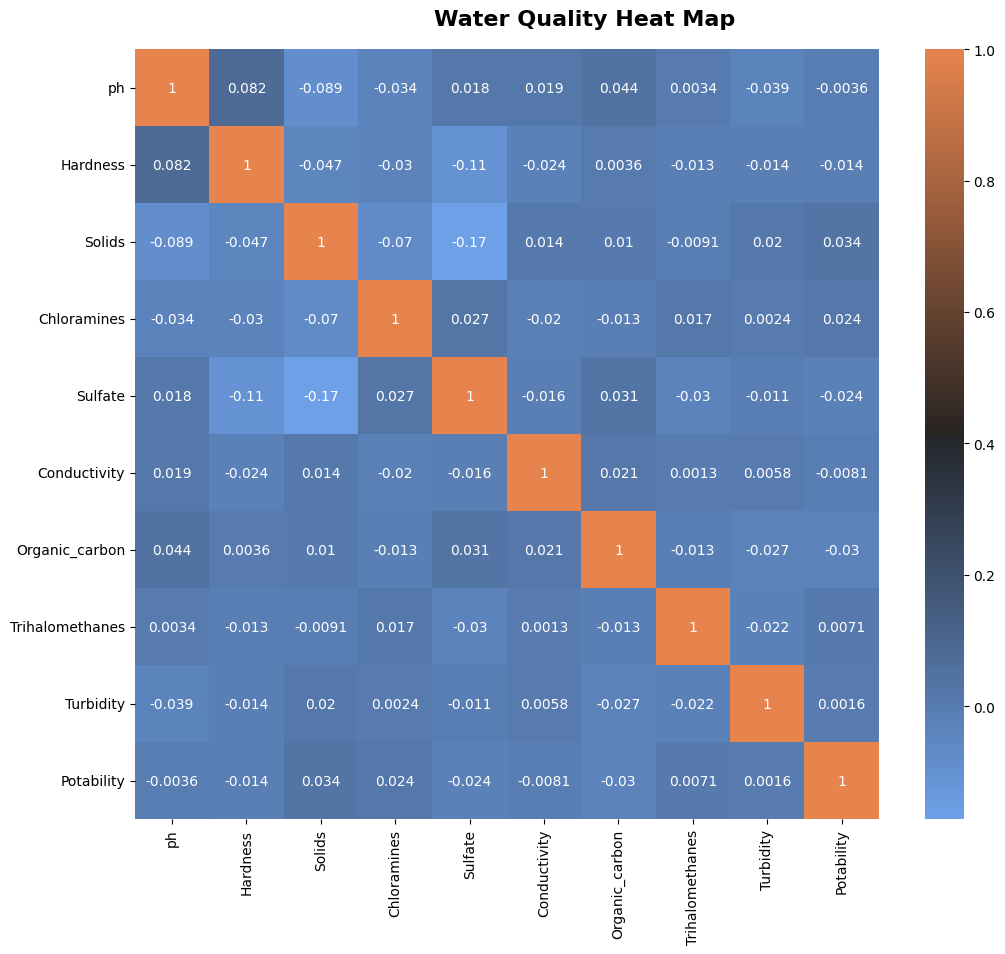

In [22]:
plt.figure(figsize = (12,10))
cmap = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)
sns.heatmap(df.corr(), annot = True, cmap=cmap)
plt.suptitle('Water Quality Heat Map', y = 0.92, size = 16, color = 'black', weight='bold')

In [23]:
df.corr().abs()['Potability'].sort_values(ascending = False)

Potability         1.000000
Solids             0.033743
Organic_carbon     0.030001
Chloramines        0.023779
Sulfate            0.023577
Hardness           0.013837
Conductivity       0.008128
Trihalomethanes    0.007130
ph                 0.003556
Turbidity          0.001581
Name: Potability, dtype: float64

Text(0.5, 1.01, 'Water Quality Pair-Plot')

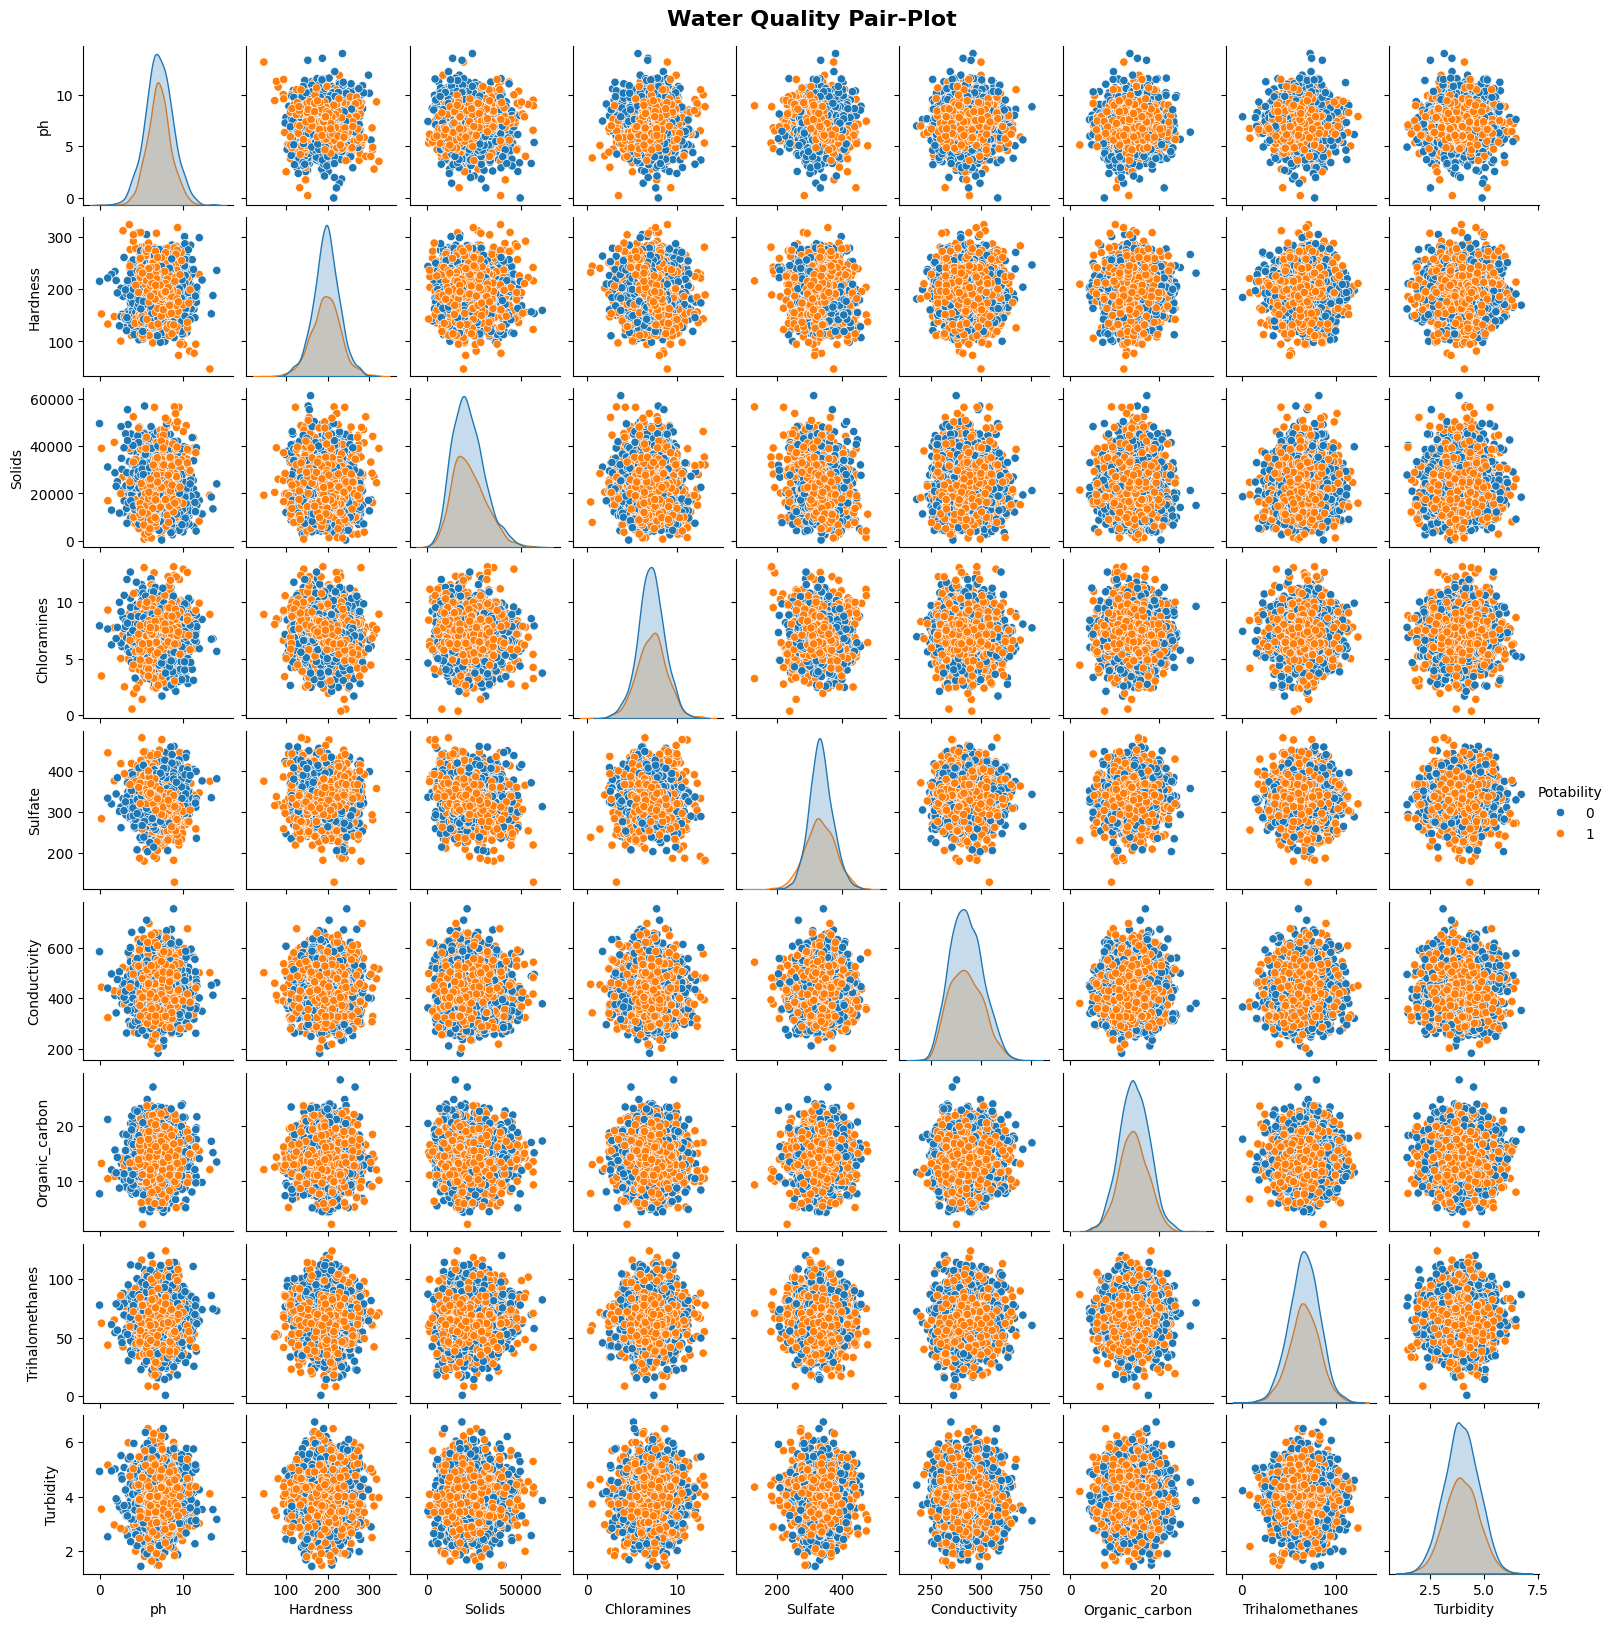

In [24]:
ax = sns.pairplot(df, hue = "Potability", diag_kind = "kde", kind = "scatter")
ax.fig.set_size_inches(16,16)
ax.fig.suptitle('Water Quality Pair-Plot',y=1.01, size = 16, color = 'black', weight='bold')

Both the correlation heatmap and pairplots between the variables show that there are no clear linear relationships between the features and the target variable. We can rule out using a simple linear model.

Text(0.5, 1.01, 'Water Quality Box-Plot')

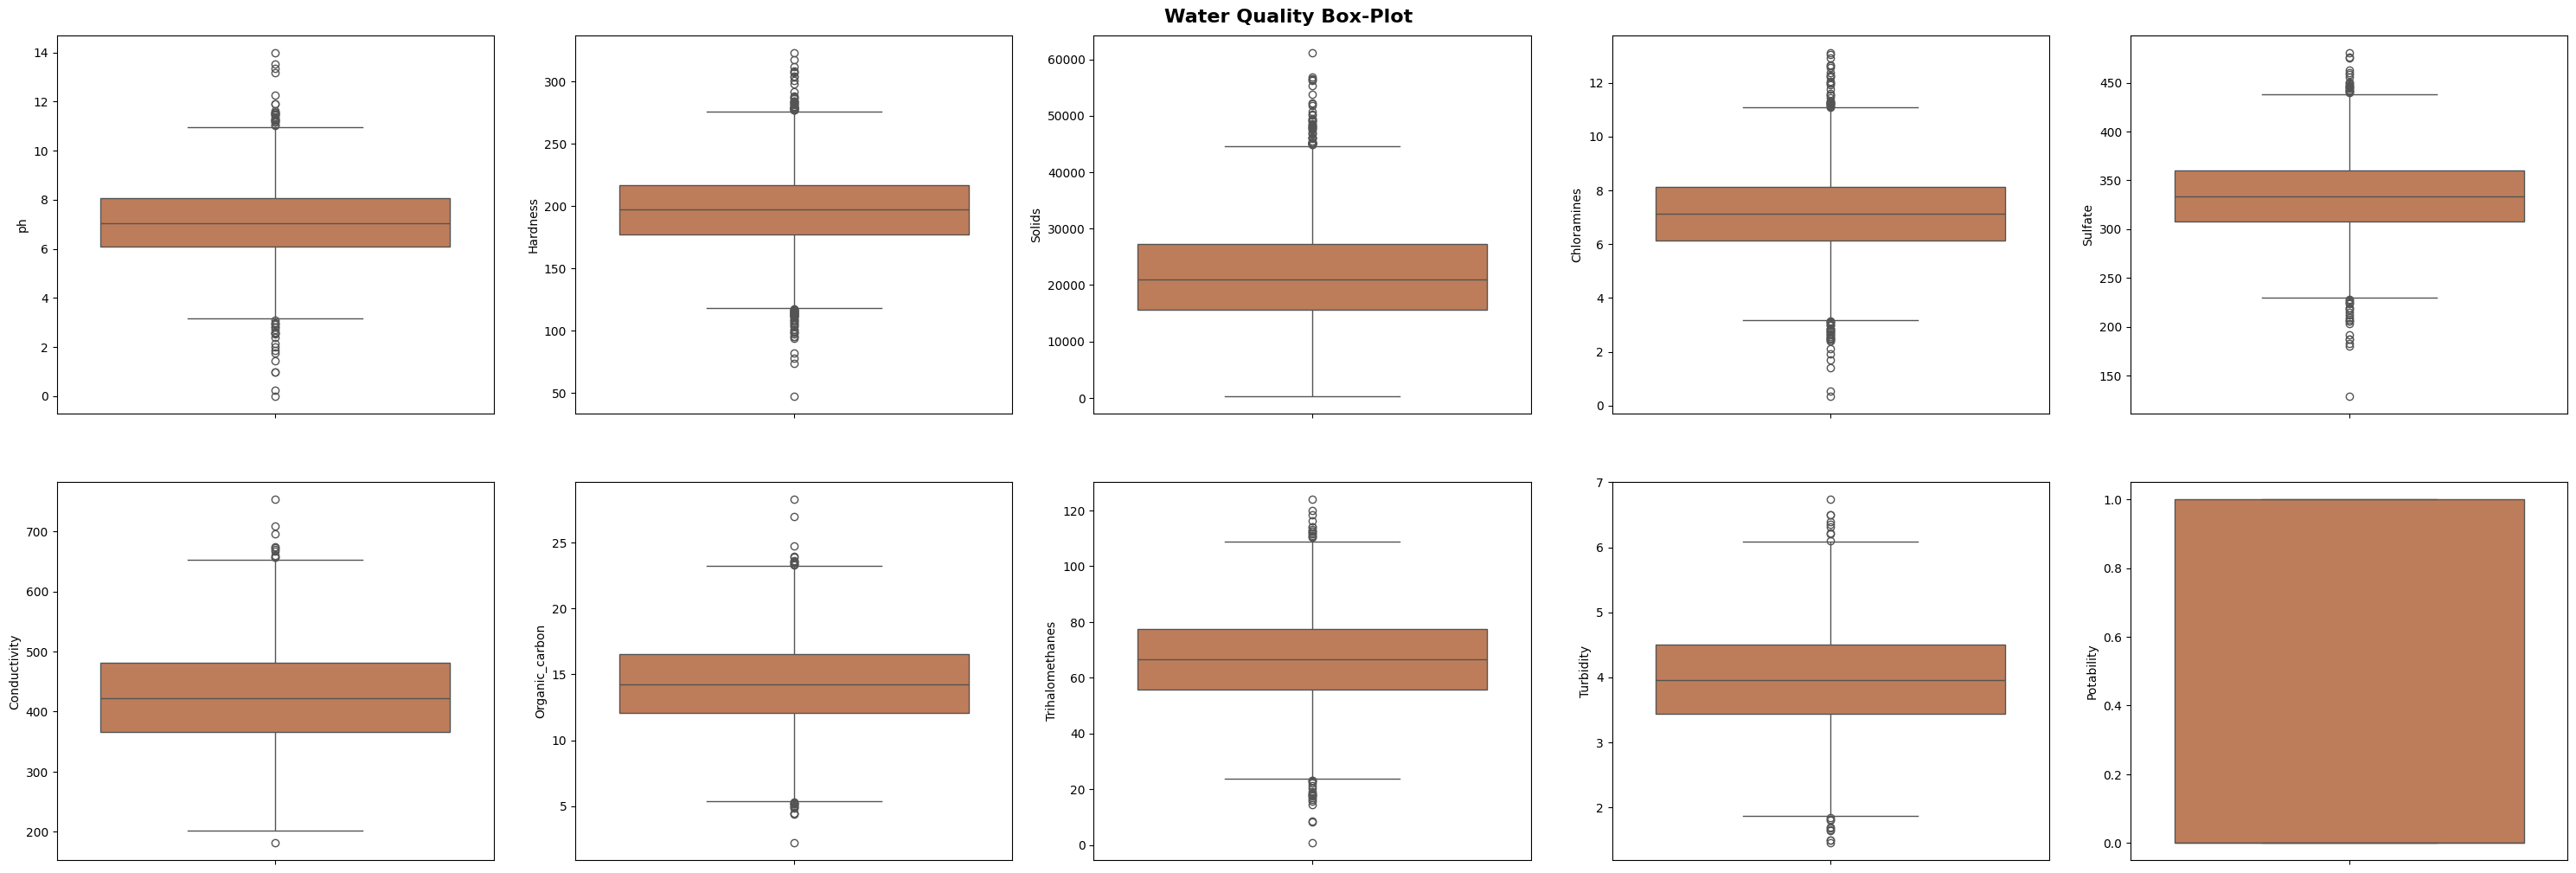

In [25]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(30,10))
index = 0
ax = ax.flatten()

for attributeCol, value in df.items():
    sns.boxplot(y=attributeCol, data=df, ax=ax[index], color="#cf7849")
    index += 1
plt.tight_layout(pad=1.5, w_pad=1.5, h_pad=5.0)

plt.suptitle('Water Quality Box-Plot',y=1.01, size = 16, color = 'black', weight='bold')

There are outliers within every feature of the dataset.

Dealing with Missing Values

In [26]:
df.isna().any().any()

True

In [27]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

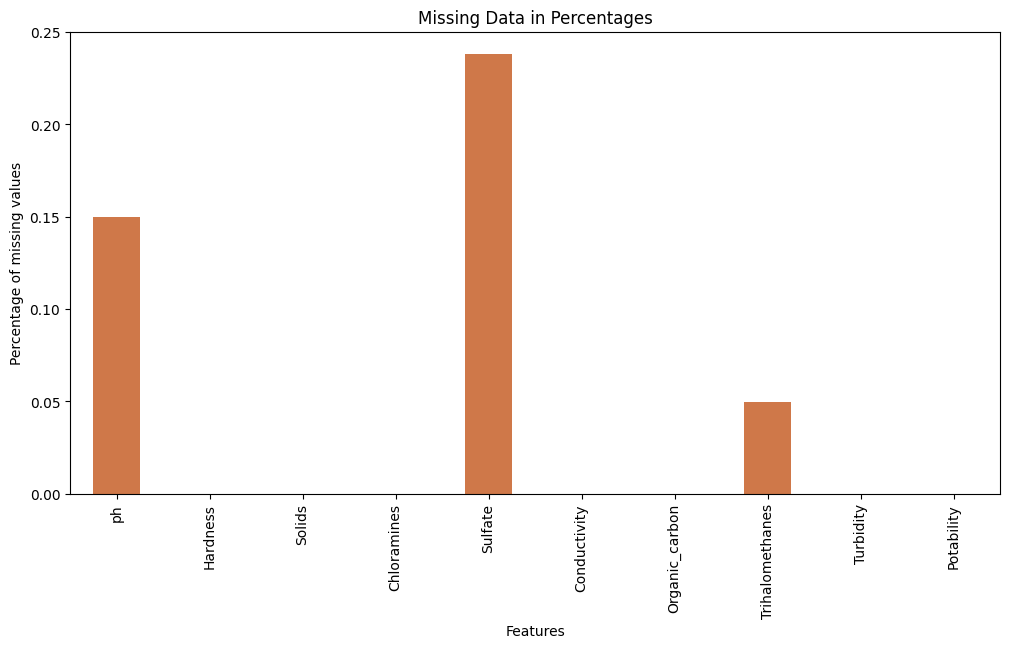

In [28]:
df.isnull().mean().plot.bar(figsize=(12,6), color="#cf7849") 
plt.ylabel('Percentage of missing values') 
plt.xlabel('Features') 
plt.title('Missing Data in Percentages');

In [29]:
df.isnull().mean()*100 

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [30]:
df[df['Potability']==0][['ph','Sulfate','Trihalomethanes']].mean()

ph                   7.085378
Sulfate            334.564290
Trihalomethanes     66.303555
dtype: float64

In [31]:
df[df['Potability']==1][['ph','Sulfate','Trihalomethanes']].mean()

ph                   7.073783
Sulfate            332.566990
Trihalomethanes     66.539684
dtype: float64

The three features with missing values all have Gaussian distribution therefore it is a safe assumption to use the mean of each feature to fill in for the missing values.

In [32]:
df1 = df.copy()
df1['ph'].fillna(value=df1['ph'].mean(),inplace=True)
df1['Sulfate'].fillna(value=df1['Sulfate'].mean(),inplace=True)
df1['Trihalomethanes'].fillna(value=df1['Trihalomethanes'].mean(),inplace=True)

In [33]:
df1.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Dealing with Outliers

Since the features have Gaussian distribution we can trim out the outliers data outside of 3 standard deviations.

In [34]:
from scipy import stats

df_water = df1.copy()
df_water = df_water[(np.abs(stats.zscore(df1)) <= 3).all(axis=1)]

In [35]:
df_water.shape

(3128, 10)

Text(0.5, 1.01, 'Water Quality Box-Plot (after outlier trimming)')

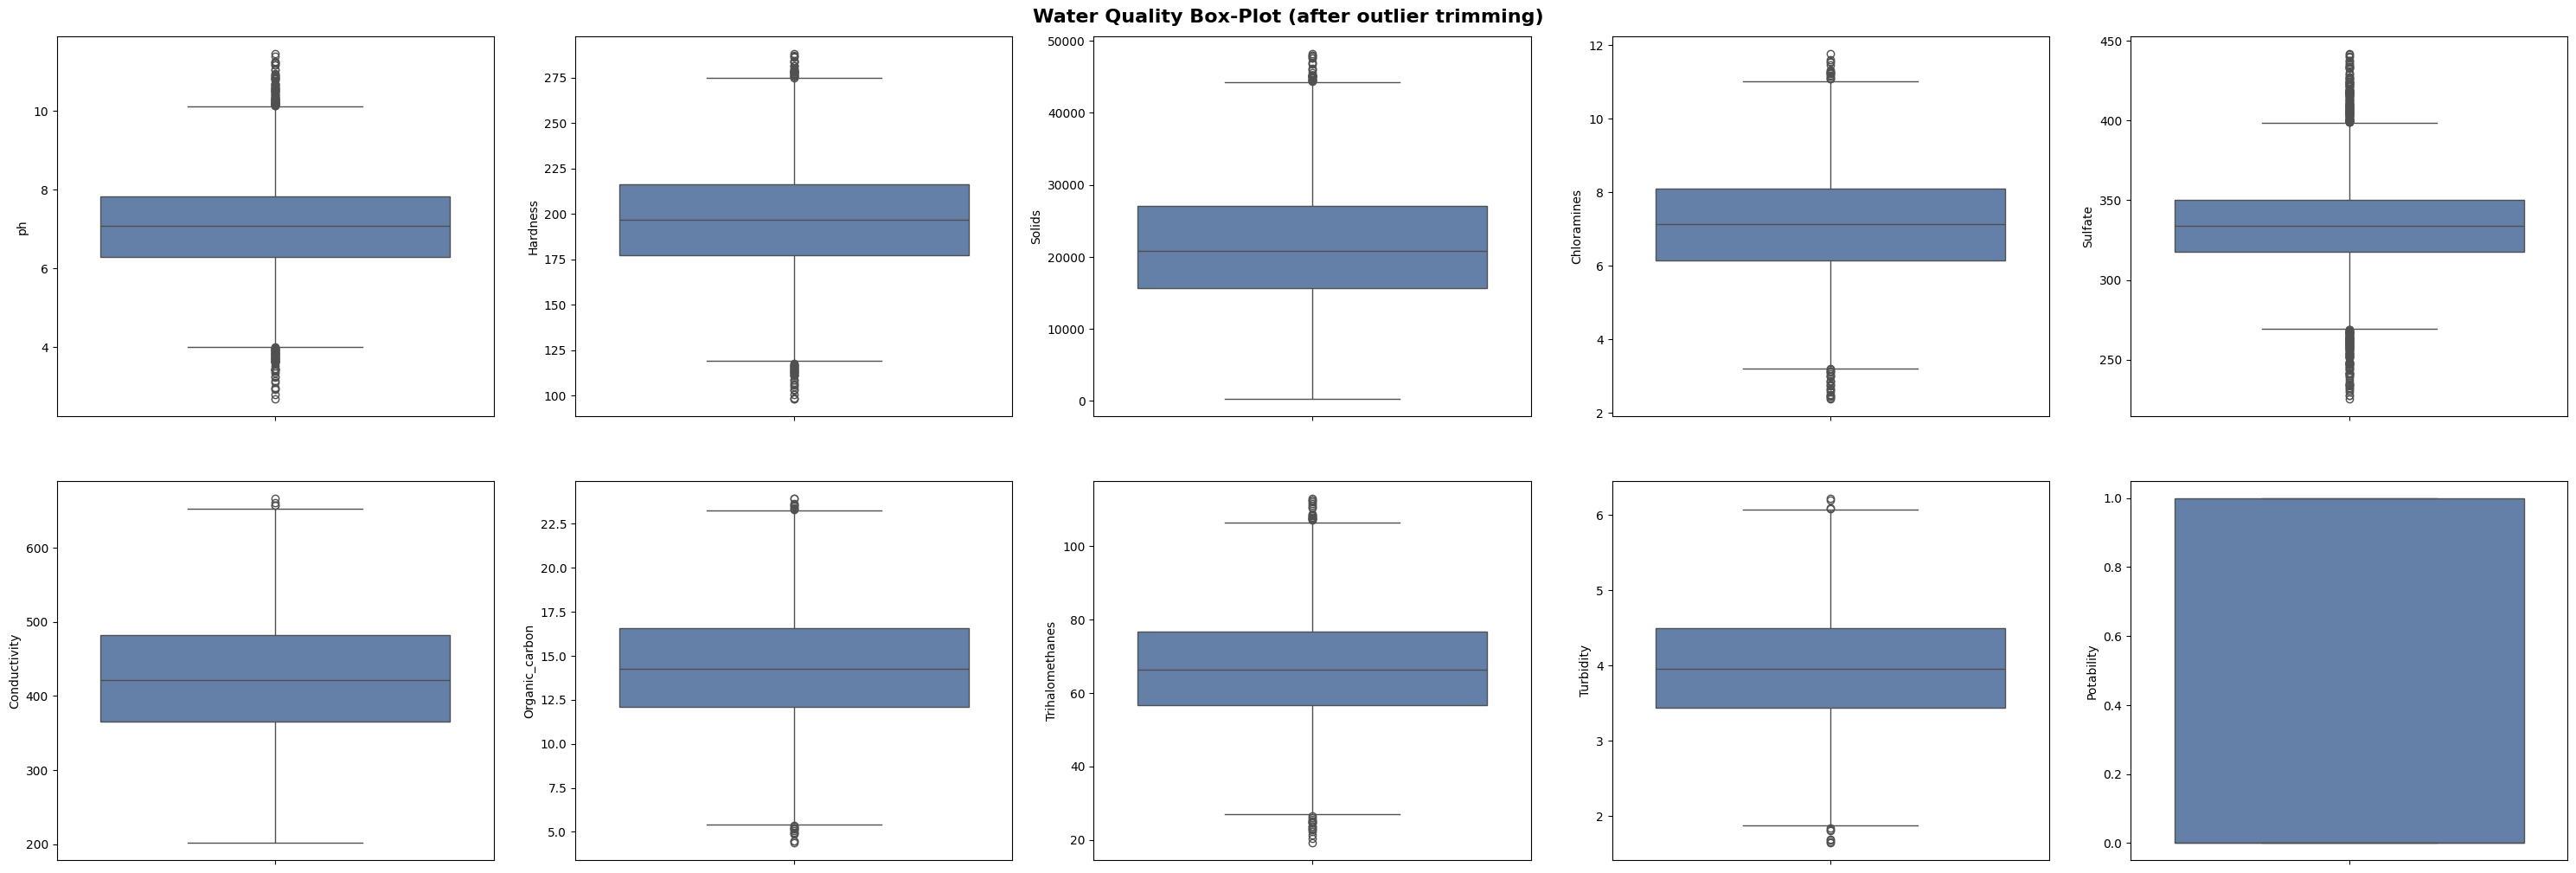

In [36]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(30,10))
index = 0
ax = ax.flatten()

for attributeCol, value in df_water.items():
    sns.boxplot(y=attributeCol, data=df_water, ax=ax[index], color='#597eb3')
    index += 1
plt.tight_layout(pad=1.5, w_pad=1.5, h_pad=5.0)
plt.suptitle('Water Quality Box-Plot (after outlier trimming)',y=1.01, size = 16, color = 'black', weight='bold')

Dealing with Class Imbalance

In [37]:
count_class_0, count_class_1 = df_water.Potability.value_counts()

df_class_0 = df_water[df_water['Potability'] == 0]
df_class_1 = df_water[df_water['Potability'] == 1]

Random over-sampling:
Potability
0    1930
1    1930
Name: count, dtype: int64


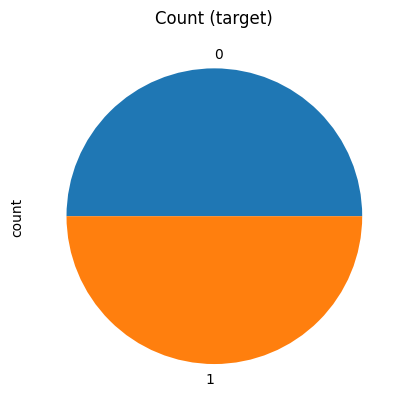

In [38]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Potability.value_counts())

df_test_over.Potability.value_counts().plot(kind='pie', title='Count (target)');

Exploring correlation using ANOVA (Analysis of Variance)

In [103]:
# def FunctionAnova(inpData, TargetVariable, attributeList):
#     from scipy.stats import f_oneway

#     SelectedPredictors=[]
    
#     for predictor in attributeList:
#         CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
#         AnovaResults = f_oneway(*CategoryGroupLists)
        
#         # If p-value <0.05, that means we reject H0
#         if (AnovaResults[1] < 0.05):
#             print(predictor, 'is correlated with', TargetVariable, ', P-Value:', AnovaResults[1])
#             SelectedPredictors.append(predictor)
#         else:
#             print(predictor, 'is NOT correlated with', TargetVariable, ', P-Value:', AnovaResults[1])
    
#     return(SelectedPredictors)

In [104]:
# attributeColList = ['ph',	'Hardness',	'Solids',	'Chloramines',	'Sulfate',	'Conductivity',	'Organic_carbon',	'Trihalomethanes',	'Turbidity']

# FunctionAnova(inpData=df_water, TargetVariable='Potability', attributeList=attributeColList)

Preprocessing: Train-test split and standardized scaler

In [41]:
from sklearn.model_selection import train_test_split

X = df_test_over.drop('Potability',axis=1)
y = df_test_over['Potability']

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

In [109]:
X_train

array([[ 0.38589485,  0.46790565, -1.4415993 , ..., -0.77893198,
         1.30650259,  2.07683923],
       [-2.10889183,  0.12186512,  0.46501906, ..., -0.65117328,
        -0.67985925,  1.21949906],
       [ 0.67897091,  1.44278018, -1.43850727, ...,  0.2032194 ,
        -1.72595802, -1.76309015],
       ...,
       [-0.47791721, -1.02561495, -0.57177203, ...,  0.75306998,
         1.01428236, -0.83836369],
       [-0.43177254,  0.89724818, -0.78073617, ..., -0.68597124,
        -0.91398352,  0.33433953],
       [ 0.59792937, -1.34001545,  2.31525083, ..., -0.92848714,
         0.06166315, -0.97502567]])

In [43]:
print("X_train:", X_train.shape, "\ny_train:", y_train.shape)
print("X_test:", X_test.shape, "\ny_test:", y_test.shape)

X_train: (3088, 9) 
y_train: (3088,)
X_test: (772, 9) 
y_test: (772,)


Exploring dimensionalty reduction using PCA:

In [44]:
#from sklearn.decomposition import PCA

# pca = PCA()

# X_train_pca = pca.fit_transform(X_train)
# exp_var_pca = pca.explained_variance_ratio_

# cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
# plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid', label='Cumulative explained variance')
# plt.ylabel('Explained variance ratio')
# plt.xlabel('Principal component index')
# plt.title("Water Quality PCA")
# plt.legend(loc='best')
# plt.show()

PCA tells us that all the features are independent and confirm our previous observations from the correlation matrix and heatmap that there are not linear relationships between the features. This PCA analysis of explained variance ratio tells us that we would still need 8 components to explain 80% of the variance. Therefore, dimensionality reduction will not be beneficial with this dataset.

Model Training -- First Iteration

In [45]:
from sklearn.metrics import precision_score, accuracy_score, mean_absolute_error, mean_squared_error, confusion_matrix, classification_report, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

1. Logistic Regression -- First Iteration

In [46]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
LogReg_pred = LogReg.predict(X_test)
LogReg_acc = accuracy_score(y_test, LogReg_pred)
LogReg_mae = mean_absolute_error(y_test, LogReg_pred)
LogReg_mse = mean_squared_error(y_test, LogReg_pred)
LogReg_rmse = np.sqrt(mean_squared_error(y_test, LogReg_pred))
LogReg_precision = precision_score(y_test, LogReg_pred)
LogReg_recall = recall_score(y_test, LogReg_pred)
LogReg_f1 = f1_score(y_test, LogReg_pred)

In [47]:
print("The accuracy for Logistic Regression is", LogReg_acc)
print("The classification report using Logistic Regression is:")
print(classification_report(y_test, LogReg_pred))

The accuracy for Logistic Regression is 0.5025906735751295
The classification report using Logistic Regression is:
              precision    recall  f1-score   support

           0       0.52      0.47      0.50       400
           1       0.49      0.53      0.51       372

    accuracy                           0.50       772
   macro avg       0.50      0.50      0.50       772
weighted avg       0.50      0.50      0.50       772



Text(0.5, 1.0, 'Logisitic Regression Confusion Matrix')

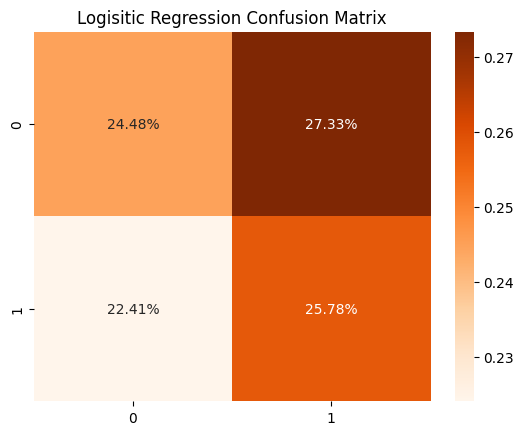

In [48]:
LogReg_cm = confusion_matrix(y_test, LogReg_pred)
sns.heatmap(LogReg_cm/np.sum(LogReg_cm), annot = True, fmt = '0.2%', cmap = 'Oranges')
plt.title("Logisitic Regression Confusion Matrix")

2. K-Nearest Neighbour Regression -- First Iteration

In [49]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
KNN_pred = KNN.predict(X_test)
KNN_acc = accuracy_score(y_test, KNN_pred)
KNN_mae = mean_absolute_error(y_test, KNN_pred)
KNN_mse = mean_squared_error(y_test, KNN_pred)
KNN_rmse = np.sqrt(mean_squared_error(y_test, KNN_pred))
KNN_precision = precision_score(y_test, KNN_pred) 
KNN_recall = recall_score(y_test, KNN_pred) 
KNN_f1 = f1_score(y_test, KNN_pred)

In [50]:
print("The accuracy for KNeighbors is", KNN_acc)
print("The classification report using KNeighbors is:", KNN_acc)
print(classification_report(y_test, KNN_pred))

The accuracy for KNeighbors is 0.6567357512953368
The classification report using KNeighbors is: 0.6567357512953368
              precision    recall  f1-score   support

           0       0.68      0.62      0.65       400
           1       0.63      0.69      0.66       372

    accuracy                           0.66       772
   macro avg       0.66      0.66      0.66       772
weighted avg       0.66      0.66      0.66       772



Text(0.5, 1.0, 'KNN Regression Confusion Matrix')

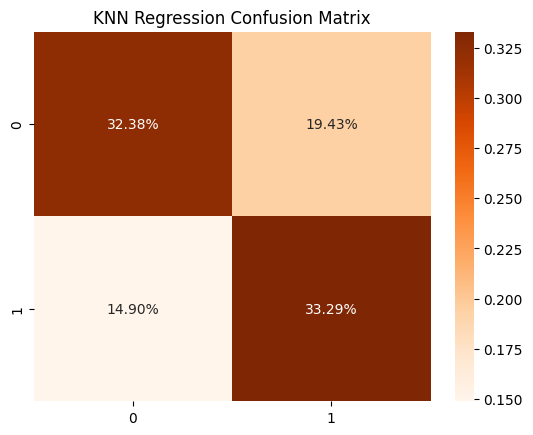

In [51]:
KNN_cm = confusion_matrix(y_test, KNN_pred)
sns.heatmap(KNN_cm/np.sum(KNN_cm), annot = True, fmt = '0.2%', cmap = 'Oranges')
plt.title("KNN Regression Confusion Matrix")

3. Decision Tree Classifier -- First Iteration

In [52]:
DecTree = DecisionTreeClassifier()
DecTree.fit(X_train, y_train)
DecTree_pred = DecTree.predict(X_test)
DecTree_acc = accuracy_score(y_test, DecTree_pred)
DecTree_precision = precision_score(y_test, DecTree_pred) 
DecTree_recall = recall_score(y_test, DecTree_pred) 
DecTree_f1 = f1_score(y_test, DecTree_pred)

In [53]:
print("The accuracy for Decision Tree is", DecTree_acc)
print("The classification report using Decision Tree is:")
print(classification_report(y_test, DecTree_pred))

The accuracy for Decision Tree is 0.7487046632124352
The classification report using Decision Tree is:
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       400
           1       0.71      0.82      0.76       372

    accuracy                           0.75       772
   macro avg       0.75      0.75      0.75       772
weighted avg       0.76      0.75      0.75       772



Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

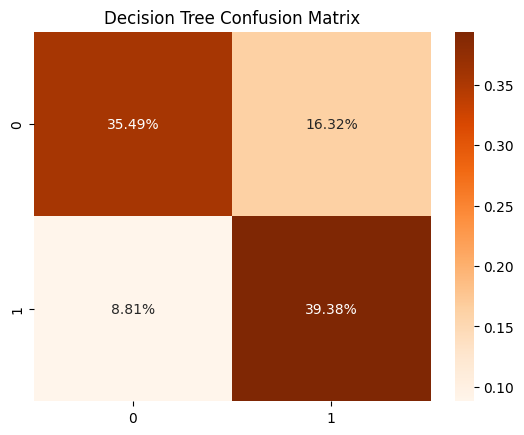

In [54]:
DecTree_cm = confusion_matrix(y_test, DecTree_pred)
sns.heatmap(DecTree_cm/np.sum(DecTree_cm), annot = True, fmt = '0.2%', cmap = 'Oranges')
plt.title("Decision Tree Confusion Matrix")

4. Random Forest Classifier -- First Iteration

In [55]:
RFTree = RandomForestClassifier()
RFTree.fit(X_train, y_train)
RFTree_pred = RFTree.predict(X_test)
RFTree_acc = accuracy_score(y_test, RFTree_pred)
RFTree_precision = precision_score(y_test, RFTree_pred) 
RFTree_recall = recall_score(y_test, RFTree_pred) 
RFTree_f1 = f1_score(y_test, RFTree_pred)

In [56]:
print("The accuracy for Random Forest is", RFTree_acc)
print("The classification report using Random Forest is:")
print(classification_report(y_test, RFTree_pred))

The accuracy for Random Forest is 0.8186528497409327
The classification report using Random Forest is:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       400
           1       0.83      0.79      0.81       372

    accuracy                           0.82       772
   macro avg       0.82      0.82      0.82       772
weighted avg       0.82      0.82      0.82       772



Text(0.5, 1.0, 'Random Forest Confusion Matrix')

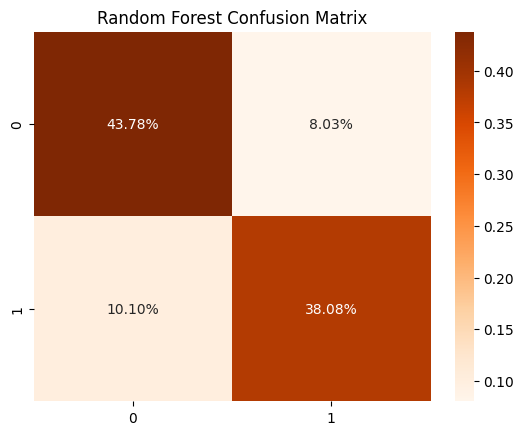

In [57]:
RFTree_cm = confusion_matrix(y_test, RFTree_pred)
sns.heatmap(RFTree_cm/np.sum(RFTree_cm), annot = True, fmt = '0.2%', cmap = 'Oranges')
plt.title("Random Forest Confusion Matrix")

5. Support Vector Machine Classifier -- First Iteration

In [58]:
SVM = SVC()
SVM.fit(X_train, y_train)
SVM_pred = SVM.predict(X_test)
SVM_acc = accuracy_score(y_test, SVM_pred)
SVM_precision = precision_score(y_test, SVM_pred) 
SVM_recall = recall_score(y_test, SVM_pred) 
SVM_f1 = f1_score(y_test, SVM_pred)

In [59]:
print("The accuracy for SVM is", SVM_acc)
print("The classification report using SVM is:", SVM_acc)
print(classification_report(y_test, SVM_pred))

The accuracy for SVM is 0.6593264248704663
The classification report using SVM is: 0.6593264248704663
              precision    recall  f1-score   support

           0       0.67      0.69      0.68       400
           1       0.65      0.63      0.64       372

    accuracy                           0.66       772
   macro avg       0.66      0.66      0.66       772
weighted avg       0.66      0.66      0.66       772



Text(0.5, 1.0, 'SVM Confusion Matrix')

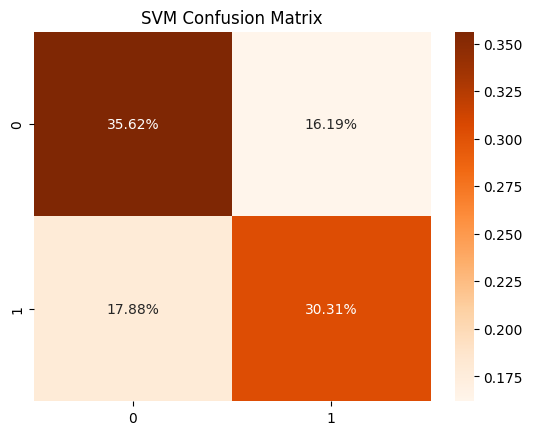

In [60]:
SVM_cm = confusion_matrix(y_test, SVM_pred)
sns.heatmap(SVM_cm/np.sum(SVM_cm), annot = True, fmt = '0.2%', cmap = 'Oranges')
plt.title("SVM Confusion Matrix")

6. XGBoost Classifier -- First Interation

In [61]:
XGB = XGBClassifier()
XGB.fit(X_train, y_train)
XGB_pred = XGB.predict(X_test)
XGB_acc = accuracy_score(y_test, XGB_pred)
XGB_precision = precision_score(y_test, XGB_pred)
XGB_recall = recall_score(y_test, XGB_pred)
XGB_f1 = f1_score(y_test, XGB_pred)
     

In [62]:
print("The accuracy for XGBoost is", XGB_acc)
print("The classification report using XGBoost is:", XGB_acc)
print(classification_report(y_test, XGB_pred))

The accuracy for XGBoost is 0.8018134715025906
The classification report using XGBoost is: 0.8018134715025906
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       400
           1       0.78      0.82      0.80       372

    accuracy                           0.80       772
   macro avg       0.80      0.80      0.80       772
weighted avg       0.80      0.80      0.80       772



Text(0.5, 1.0, 'XGBoost Confusion Matrix')

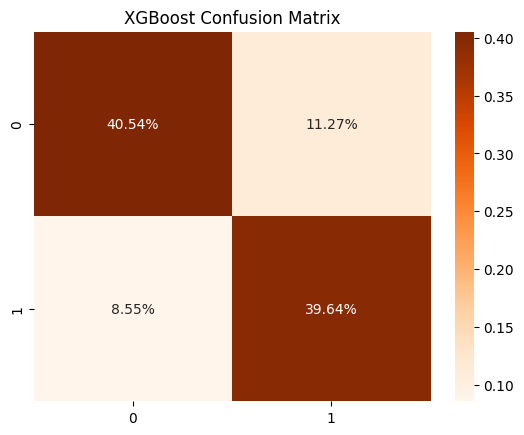

In [63]:
XGB_cm = confusion_matrix(y_test, XGB_pred)
sns.heatmap(XGB_cm/np.sum(XGB_cm), annot = True, fmt = '0.2%', cmap = 'Oranges')
plt.title("XGBoost Confusion Matrix")

Algorithm Comparison -- First Iteration

In [64]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'KNN Regression', 'Decision Tree', 'Random Forest', 'Support Vector', 'XGBoost'],
    'Accuracy' :[LogReg_acc, KNN_acc, DecTree_acc, RFTree_acc, SVM_acc, XGB_acc],
    'Precision' :[LogReg_precision, KNN_precision, DecTree_precision, RFTree_precision, SVM_precision, XGB_precision],
    'Recall' :[LogReg_recall, KNN_recall, DecTree_recall, RFTree_recall, SVM_recall, XGB_recall],
    'F1 Score' :[LogReg_f1, KNN_f1, DecTree_f1, RFTree_f1, SVM_f1, XGB_f1]
})
models = models.sort_values(by='Accuracy', ascending=False)

In [65]:
models

,Model,Accuracy,Precision,Recall,F1 Score
3,Random Forest,0.818653,0.825843,0.790323,0.807692
5,XGBoost,0.801813,0.778626,0.822581,0.800000
2,Decision Tree,0.748705,0.706977,0.817204,0.758105
4,Support Vector,0.659326,0.651811,0.629032,0.640219
1,KNN Regression,0.656736,0.631450,0.690860,0.659820
0,Logistic Regression,0.502591,0.485366,0.534946,0.508951


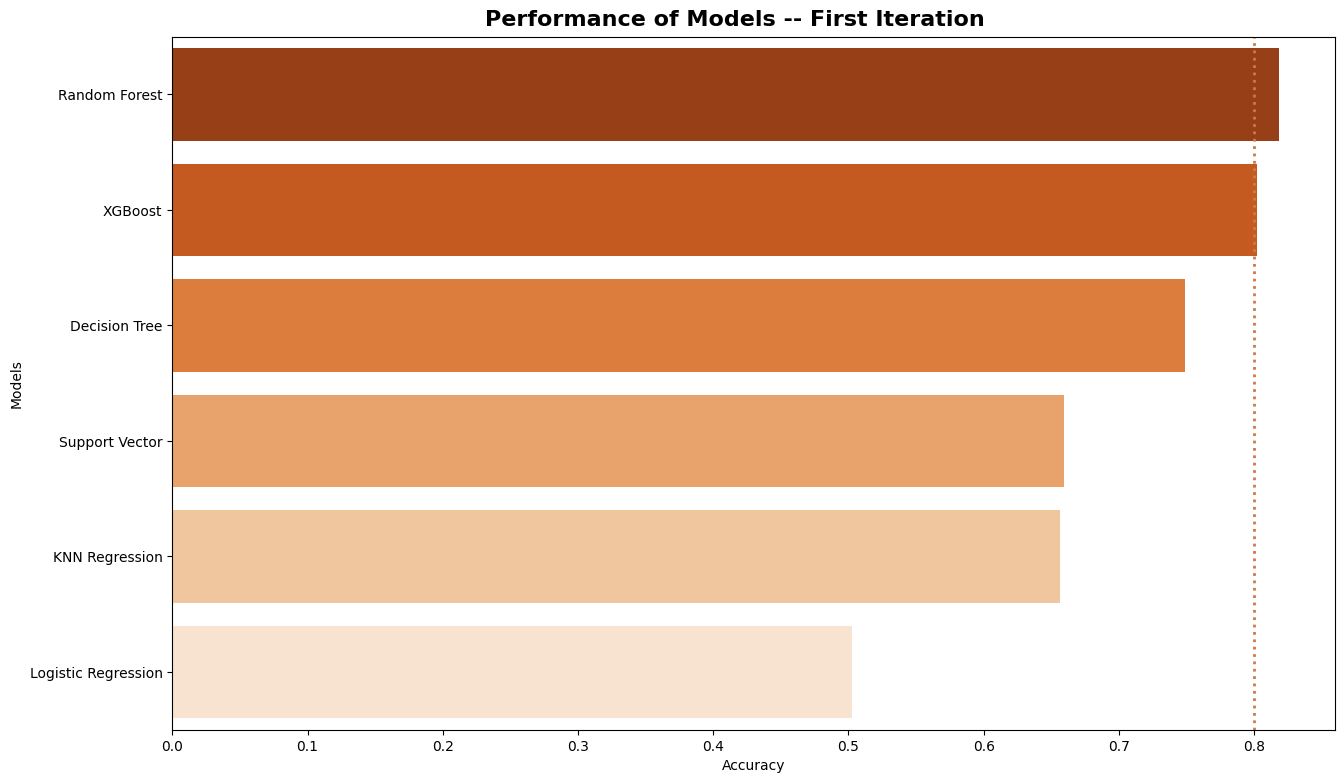

In [66]:
fig = plt.figure(figsize=(15,9))

ax = sns.barplot(data=models, 
                 y='Model', 
                 x='Accuracy',
                 palette = 'Oranges_r')

ax.figure.suptitle('Performance of Models -- First Iteration',y=0.91, size = 16, color = 'black', weight='bold');

plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.axvline(x = 0.8, ymin = 0, ymax = 1,
            linewidth = 2, linestyle =":",
            color ='#cf7849');

After the first iteration of model training we can see that Logistic Regression performed the lowest while KNN, SVM and XGBoost had close accuracy values around 65%. Decision tree classifier had a 76% accuracy while Random Forest was able to be accurate to 83%

Hyper-tunning parameters

In [67]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

lgr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc = SVC()
xgb =XGBClassifier(eval_metric = 'logloss', use_label_encoder=False)

In [68]:
para_lgr = {'solver':['newton-cg', 'lbfgs', 'sag', 'saga', 'liblinear'], 'penalty': ['l1', 'l2', 'elasticnet', 'none']}
grid_lgr = GridSearchCV(lgr, param_grid=para_lgr, cv=5)
grid_lgr.fit(X_train, y_train)
print("Best parameters for Logistic Regression:", grid_lgr.best_params_)

Best parameters for Logistic Regression: {'penalty': 'l2', 'solver': 'lbfgs'}


In [69]:
para_knn = {'n_neighbors':np.arange(1, 50), 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knn = GridSearchCV(knn, param_grid=para_knn, cv=5)
grid_knn.fit(X_train, y_train)
print("Best parameters for KNN:", grid_knn.best_params_)

Best parameters for KNN: {'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}


In [70]:
para_dt = {'criterion':['gini','entropy'],'max_depth':np.arange(1, 50), 'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100]}
grid_dt = GridSearchCV(dt, param_grid=para_dt, cv=5) 
grid_dt.fit(X_train, y_train)
print("Best parameters for Decision Tree:", grid_dt.best_params_)

Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 34, 'min_samples_leaf': 1}


In [71]:
params_rf = {'n_estimators':[100,200, 350, 500], 'min_samples_leaf':[2, 10, 30]}
grid_rf = GridSearchCV(rf, param_grid=params_rf, cv=5)
grid_rf.fit(X_train, y_train)
print("Best parameters for Random Forest:", grid_rf.best_params_)

Best parameters for Random Forest: {'min_samples_leaf': 2, 'n_estimators': 500}


In [72]:
para_svc = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid_svc = GridSearchCV(svc, param_grid=para_svc, cv=5)
grid_svc.fit(X_train, y_train)
print("Best parameters for SVM:", grid_svc.best_params_)

Best parameters for SVM: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [73]:
params_xgb = {'n_estimators': [50,100,250,400,600,800,1000], 'learning_rate': [0.2,0.5,0.8,1]}
rs_xgb =  RandomizedSearchCV(xgb, param_distributions=params_xgb, cv=5)
rs_xgb.fit(X_train, y_train)
print("Best parameters for XGBoost:", rs_xgb.best_params_)

Best parameters for XGBoost: {'n_estimators': 100, 'learning_rate': 0.2}


Predictive Modeling/Classication -- Second Iteration:
After hypertuning

1. Logistic Regression -- Second Iteration

In [74]:
LogReg2 = LogisticRegression(penalty = 'l1', solver= 'liblinear')
LogReg2.fit(X_train, y_train)
LogReg2_pred = LogReg2.predict(X_test)
LogReg2_acc = accuracy_score(y_test, LogReg2_pred)
LogReg2_mae = mean_absolute_error(y_test, LogReg2_pred)
LogReg2_mse = mean_squared_error(y_test, LogReg2_pred)
LogReg2_rmse = np.sqrt(mean_squared_error(y_test, LogReg2_pred))
LogReg2_precision = precision_score(y_test, LogReg2_pred)
LogReg2_recall = recall_score(y_test, LogReg2_pred)
LogReg2_f1 = f1_score(y_test, LogReg2_pred)

In [75]:
print("The accuracy for Logistic Regression is", LogReg2_acc)
print("The classification report using Logistic Regression is:")
print(classification_report(y_test, LogReg2_pred))

The accuracy for Logistic Regression is 0.5051813471502591
The classification report using Logistic Regression is:
              precision    recall  f1-score   support

           0       0.52      0.47      0.50       400
           1       0.49      0.54      0.51       372

    accuracy                           0.51       772
   macro avg       0.51      0.51      0.51       772
weighted avg       0.51      0.51      0.50       772



Text(0.5, 1.0, 'Logisitic Regression Confusion Matrix')

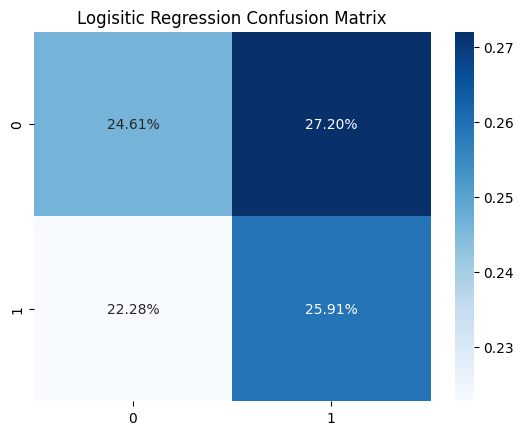

In [76]:
LogReg2_cm = confusion_matrix(y_test, LogReg2_pred)
sns.heatmap(LogReg2_cm/np.sum(LogReg2_cm), annot = True, fmt = '0.2%', cmap = 'Blues')
plt.title("Logisitic Regression Confusion Matrix")

2. K-Nearest Neighbour Regression -- Second Iteration

In [77]:
KNN2 = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 1, weights ='uniform')
KNN2.fit(X_train, y_train)
KNN2_pred = KNN2.predict(X_test)
KNN2_acc = accuracy_score(y_test, KNN2_pred)
KNN2_mae = mean_absolute_error(y_test, KNN2_pred)
KNN2_mse = mean_squared_error(y_test, KNN2_pred)
KNN2_rmse = np.sqrt(mean_squared_error(y_test, KNN2_pred))
KNN2_precision = precision_score(y_test, KNN2_pred) 
KNN2_recall = recall_score(y_test, KNN2_pred) 
KNN2_f1 = f1_score(y_test, KNN2_pred)

In [78]:
print("The accuracy for KNeighbors is", KNN2_acc)
print("The classification report using KNeighbors is:", KNN2_acc)
print(classification_report(y_test, KNN2_pred))

The accuracy for KNeighbors is 0.7642487046632125
The classification report using KNeighbors is: 0.7642487046632125
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       400
           1       0.73      0.82      0.77       372

    accuracy                           0.76       772
   macro avg       0.77      0.77      0.76       772
weighted avg       0.77      0.76      0.76       772



Text(0.5, 1.0, 'KNN Regression Confusion Matrix')

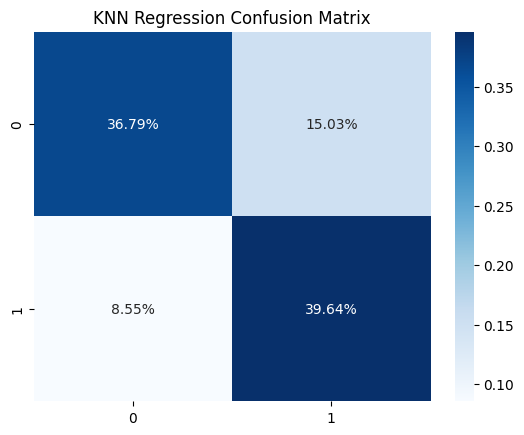

In [79]:
KNN2_cm = confusion_matrix(y_test, KNN2_pred)
sns.heatmap(KNN2_cm/np.sum(KNN2_cm), annot = True, fmt = '0.2%', cmap = 'Blues')
plt.title("KNN Regression Confusion Matrix")

3. Decision Tree Classifier -- Second Iteration

In [80]:
DecTree2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 44, min_samples_leaf = 1)
DecTree2.fit(X_train, y_train)
DecTree2_pred = DecTree2.predict(X_test)
DecTree2_acc = accuracy_score(y_test, DecTree2_pred)
DecTree2_precision = precision_score(y_test, DecTree2_pred) 
DecTree2_recall = recall_score(y_test, DecTree2_pred) 
DecTree2_f1 = f1_score(y_test, DecTree2_pred)

In [81]:
print("The accuracy for Decision Tree is", DecTree2_acc)
print("The classification report using Decision Tree is:")
print(classification_report(y_test, DecTree2_pred))

The accuracy for Decision Tree is 0.7474093264248705
The classification report using Decision Tree is:
              precision    recall  f1-score   support

           0       0.81      0.67      0.73       400
           1       0.70      0.84      0.76       372

    accuracy                           0.75       772
   macro avg       0.76      0.75      0.75       772
weighted avg       0.76      0.75      0.75       772



Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

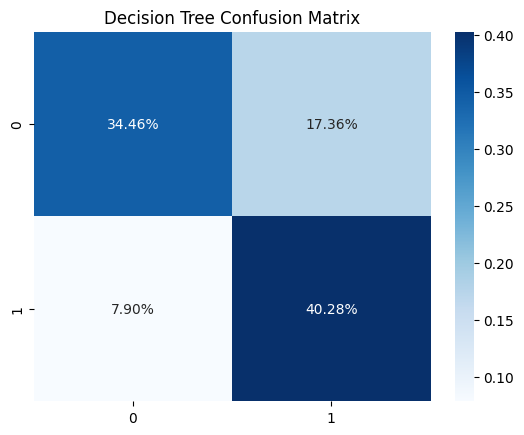

In [82]:
DecTree2_cm = confusion_matrix(y_test, DecTree2_pred)
sns.heatmap(DecTree2_cm/np.sum(DecTree2_cm), annot = True, fmt = '0.2%', cmap = 'Blues')
plt.title("Decision Tree Confusion Matrix")

4. Random Forest Classifier -- Second Iteration

In [83]:
RFTree2 = RandomForestClassifier(min_samples_leaf = 2, n_estimators = 200)
RFTree2.fit(X_train, y_train)
RFTree2_pred = RFTree2.predict(X_test)
RFTree2_acc = accuracy_score(y_test, RFTree2_pred)
RFTree2_precision = precision_score(y_test, RFTree2_pred) 
RFTree2_recall = recall_score(y_test, RFTree2_pred) 
RFTree2_f1 = f1_score(y_test, RFTree2_pred)

In [84]:
print("The accuracy for Random Forest is", RFTree2_acc)
print("The classification report using Random Forest is:")
print(classification_report(y_test, RFTree2_pred))

The accuracy for Random Forest is 0.8173575129533679
The classification report using Random Forest is:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       400
           1       0.81      0.81      0.81       372

    accuracy                           0.82       772
   macro avg       0.82      0.82      0.82       772
weighted avg       0.82      0.82      0.82       772



Text(0.5, 1.0, 'Random Forest Confusion Matrix')

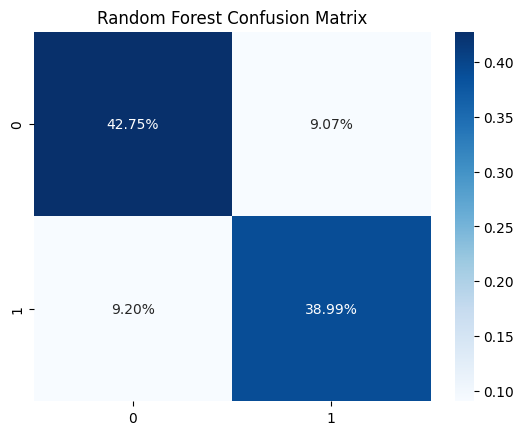

In [85]:
RFTree2_cm = confusion_matrix(y_test, RFTree2_pred)
sns.heatmap(RFTree2_cm/np.sum(RFTree2_cm), annot = True, fmt = '0.2%', cmap = 'Blues')
plt.title("Random Forest Confusion Matrix")

5. Support Vector Machine Classifier -- Second Iteration

In [86]:
SVM2 = SVC(C = 10, gamma = 1, kernel = 'rbf')
SVM2.fit(X_train, y_train)
SVM2_pred = SVM2.predict(X_test)
SVM2_acc = accuracy_score(y_test, SVM2_pred)
SVM2_precision = precision_score(y_test, SVM2_pred) 
SVM2_recall = recall_score(y_test, SVM2_pred) 
SVM2_f1 = f1_score(y_test, SVM2_pred)

In [87]:
print("The accuracy for SVM is", SVM2_acc)
print("The classification report using SVM is:", SVM2_acc)
print(classification_report(y_test, SVM2_pred))

The accuracy for SVM is 0.810880829015544
The classification report using SVM is: 0.810880829015544
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       400
           1       0.86      0.73      0.79       372

    accuracy                           0.81       772
   macro avg       0.82      0.81      0.81       772
weighted avg       0.82      0.81      0.81       772



Text(0.5, 1.0, 'SVM Confusion Matrix')

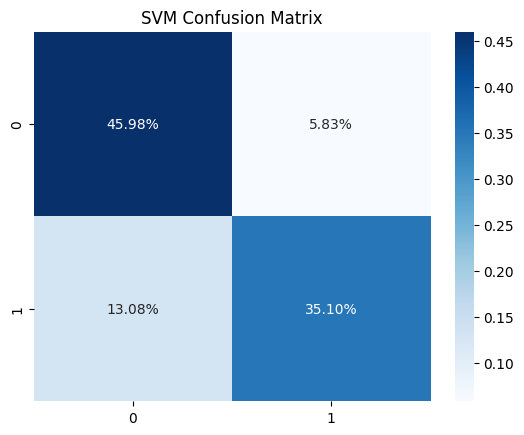

In [88]:
SVM2_cm = confusion_matrix(y_test, SVM2_pred)
sns.heatmap(SVM2_cm/np.sum(SVM2_cm), annot = True, fmt = '0.2%', cmap = 'Blues')
plt.title("SVM Confusion Matrix")

6. XGBoost Classifier -- Second Iteration

In [89]:
XGB2 = XGBClassifier(n_estimators = 600, learning_rate = 0.8)
XGB2.fit(X_train, y_train)
XGB2_pred = XGB2.predict(X_test)
XGB2_acc = accuracy_score(y_test, XGB2_pred)
XGB2_precision = precision_score(y_test, XGB2_pred)
XGB2_recall = recall_score(y_test, XGB2_pred)
XGB2_f1 = f1_score(y_test, XGB2_pred)

In [90]:
print("The accuracy for XGBoost is", XGB2_acc)
print("The classification report using XGBoost is:", XGB2_acc)
print(classification_report(y_test, XGB2_pred))

The accuracy for XGBoost is 0.7746113989637305
The classification report using XGBoost is: 0.7746113989637305
              precision    recall  f1-score   support

           0       0.80      0.75      0.78       400
           1       0.75      0.80      0.77       372

    accuracy                           0.77       772
   macro avg       0.78      0.78      0.77       772
weighted avg       0.78      0.77      0.77       772



Text(0.5, 1.0, 'XGBoost Confusion Matrix')

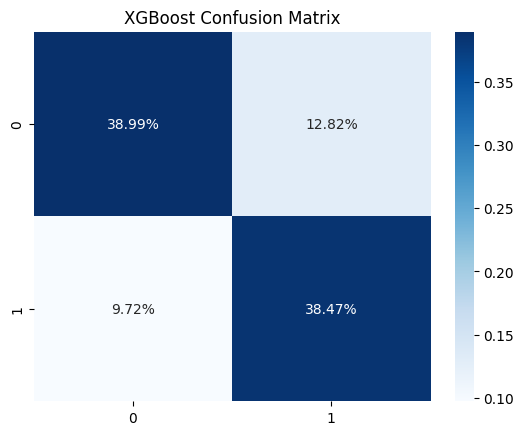

In [91]:
XGB2_cm = confusion_matrix(y_test, XGB2_pred)
sns.heatmap(XGB2_cm/np.sum(XGB2_cm), annot = True, fmt = '0.2%', cmap = 'Blues')
plt.title("XGBoost Confusion Matrix")

Comparing Models -- Second Iteration:

In [92]:
models2 = pd.DataFrame({
    'Model':['Logistic Regression', 'KNN Regression', 'Decision Tree', 'Random Forest', 'Support Vector', 'XGBoost'],
    'Accuracy' :[LogReg2_acc, KNN2_acc, DecTree2_acc, RFTree2_acc, SVM2_acc, XGB2_acc],
    'Precision' :[LogReg2_precision, KNN2_precision, DecTree2_precision, RFTree2_precision, SVM2_precision, XGB2_precision],
    'Recall' :[LogReg2_recall, KNN2_recall, DecTree2_recall, RFTree2_recall, SVM2_recall, XGB2_recall],
    'F1 Score' :[LogReg2_f1, KNN2_f1, DecTree2_f1, RFTree2_f1, SVM2_f1, XGB2_f1]
})
models2 = models2.sort_values(by='Accuracy', ascending=False)

In [93]:
models2

,Model,Accuracy,Precision,Recall,F1 Score
3,Random Forest,0.817358,0.811321,0.809140,0.810229
4,Support Vector,0.810881,0.857595,0.728495,0.787791
5,XGBoost,0.774611,0.750000,0.798387,0.773438
1,KNN Regression,0.764249,0.725118,0.822581,0.770781
2,Decision Tree,0.747409,0.698876,0.836022,0.761322
0,Logistic Regression,0.505181,0.487805,0.537634,0.511509


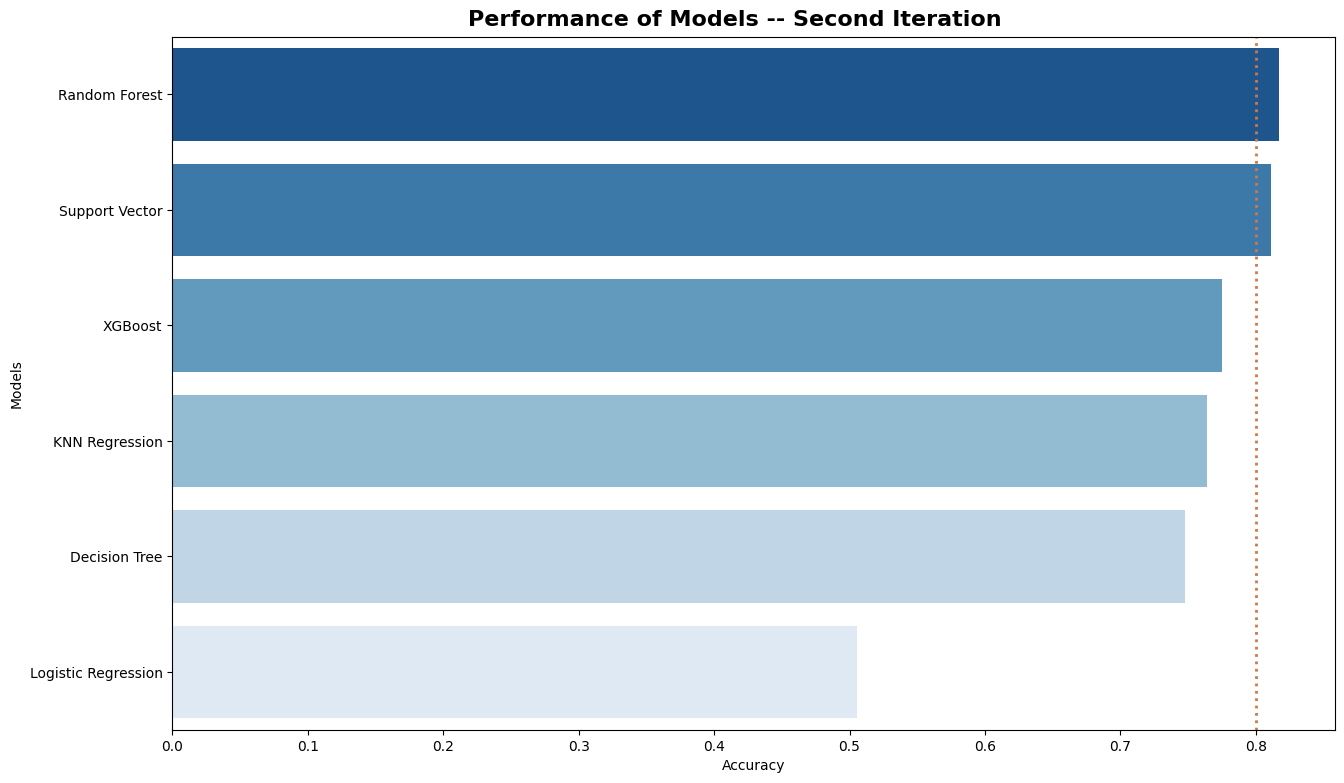

In [94]:
fig = plt.figure(figsize=(15,9))

ax = sns.barplot(data=models2, 
                 y='Model', 
                 x='Accuracy',
                 palette = 'Blues_r')

ax.figure.suptitle('Performance of Models -- Second Iteration',y=0.91, size = 16, color = 'black', weight='bold');

plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.axvline(x = 0.8, ymin = 0, ymax = 1,
            linewidth = 2, linestyle =":",
            color ='#cf7849');

Comparing First and Second Iterations:

In [95]:
comp_iterations = pd.DataFrame({
    'Model':['Logistic Regression', 'KNN Regression', 'Decision Tree', 'Random Forest', 'Support Vector', 'XGBoost'],
    '2nd Iteration' :[LogReg2_acc, KNN2_acc, DecTree2_acc, RFTree2_acc, SVM2_acc, XGB2_acc],
    '1st Iteration' :[LogReg_acc, KNN_acc, DecTree_acc, RFTree_acc, SVM_acc, XGB_acc],
})
comp_iterations

,Model,2nd Iteration,1st Iteration
0,Logistic Regression,0.505181,0.502591
1,KNN Regression,0.764249,0.656736
2,Decision Tree,0.747409,0.748705
3,Random Forest,0.817358,0.818653
4,Support Vector,0.810881,0.659326
5,XGBoost,0.774611,0.801813


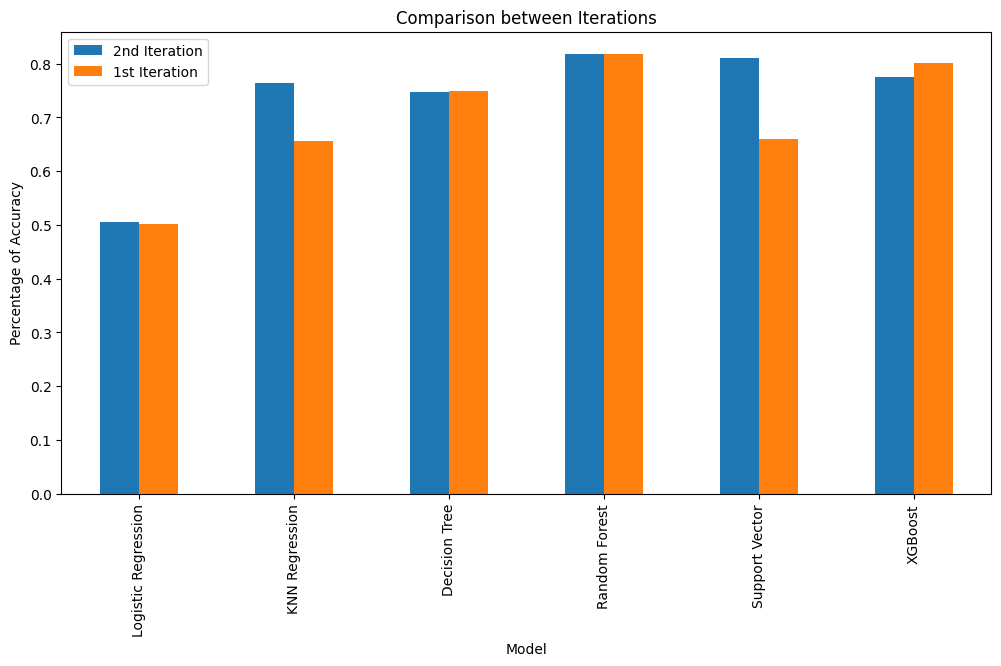

In [96]:
comp_iterations.plot.bar(figsize=(12,6))
plt.xticks([0,1,2,3,4,5],['Logistic Regression', 'KNN Regression', 'Decision Tree', 'Random Forest', 'Support Vector', 'XGBoost'])
plt.ylabel('Percentage of Accuracy') 
plt.xlabel('Model') 
plt.title('Comparison between Iterations');

After our second iteration of model (with hypertuning) we can see that Random Forest Classifier algortihm performed the best with the highest accuracy. We will use Random Forest and SVM to continue our model evaluation with cross validation

Cross Validation

In [97]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from statistics import mean, stdev

cv = KFold(n_splits=10, random_state=1, shuffle=True)

RFTree2_scores = cross_val_score(RFTree2, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
SVM2_scores = cross_val_score(SVM2, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
XGB2_scores = cross_val_score(XGB2, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

print('Accuracy of CV - Random Forest: %.4f (%.4f)' % (mean(RFTree2_scores), stdev(RFTree2_scores)))
print('Accuracy of CV - SVM: %.4f (%.4f)' % (mean(SVM2_scores), stdev(SVM2_scores)))
print('Accuracy of CV - XGBoost: %.4f (%.4f)' % (mean(XGB2_scores), stdev(XGB2_scores)))
 

Accuracy of CV - Random Forest: 0.8541 (0.0217)
Accuracy of CV - SVM: 0.8813 (0.0217)
Accuracy of CV - XGBoost: 0.8091 (0.0274)


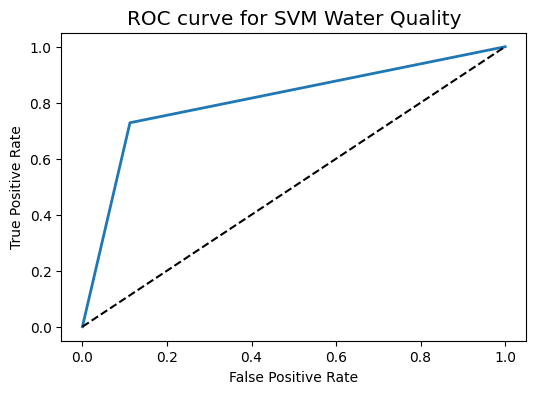

In [98]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, SVM2_pred)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for SVM Water Quality')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [99]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, SVM2_pred)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8080


In [100]:
Cross_validated_ROC_AUC = cross_val_score(SVM2, X_train, y_train, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8841


In [101]:
SVM2.predict([[8.3,214.3,22018.4,8.05,356.8,363.2,18.4,100.3,4.6]])

array([0], dtype=int64)

In [102]:
SVM2.predict([[0.288593,1.227231,-0.031677,-0.337185,2.039489,-1.571689,1.950835,0.120936,0.353029]])

array([1], dtype=int64)